## 導入標準套件

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 基本計算 + 函數

瓦時(Wh)　與　mAh(毫安時)　換算公式。

$$Wh = \frac{mAh}{1000} \times V$$

In [2]:
mAh = 1250
V = 6
Wh = mAh/1000 * V

In [3]:
Wh

7.5

定義成函數

In [4]:
def Wh(mAh, V):
    return mAh/1000 * V

In [5]:
Wh(1250, 6)

7.5

In [7]:
Wh(12000, 5)

60.0

## 互動的基本篇

## 互動介面

In [8]:
from ipywidgets import interact

In [9]:
interact(Wh, mAh=1000, V=5)

A Jupyter Widget

<function __main__.Wh>

In [15]:
def 瓦時(毫安時, 伏特):
    mAh = float(毫安時)
    V = float(伏特)
    return print("瓦時 Wh =", mAh/1000 * V)

In [11]:
瓦時("1250", "5")

6.25

In [12]:
from ipywidgets import interact_manual

In [16]:
interact_manual(瓦時, 毫安時="mAh", 伏特="V");

A Jupyter Widget

In [17]:
import pandas_datareader as pdr

In [18]:
df = pdr.get_data_yahoo("AAPL")

In [22]:
dfy = df[-240:]

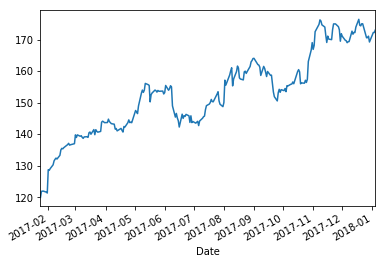

In [25]:
dfy.Close.plot()

In [26]:
dfm = df[-20:]

In [27]:
dfm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000
2017-12-07,169.029999,170.440002,168.910004,169.320007,169.320007,25673300
2017-12-08,170.490005,171.000000,168.820007,169.369995,169.369995,23355200
2017-12-11,169.199997,172.889999,168.789993,172.669998,172.669998,35273800
2017-12-12,172.149994,172.389999,171.460007,171.699997,171.699997,19409200
2017-12-13,172.500000,173.539993,172.000000,172.270004,172.270004,23818400
2017-12-14,172.399994,173.130005,171.649994,172.220001,172.220001,20476500
2017-12-15,173.630005,174.169998,172.460007,173.970001,173.970001,40169300
2017-12-18,174.880005,177.199997,174.860001,176.419998,176.419998,29421100


## K 線圖

在 `matplotlib.finance` 中有個叫 `candlestick2_ochl` 的指令。

candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g')


在 matplotlib 2.2 之後就要正式說再見的 `matplotlib.finace`, 之後會獨立叫 `mpl_finance`。

    pip install https://github.com/matplotlib/mpl_finance/archive/master.zip



In [62]:
from matplotlib.finance import candlestick2_ohlc

In [63]:
dfm_ohlc = dfm[["Open", "High", "Low", "Close"]].values

(<matplotlib.collections.LineCollection at 0x11832bb00>,
 <matplotlib.collections.PolyCollection at 0x1187fd438>)

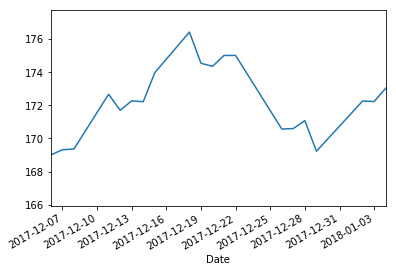

In [66]:
ax = plt.gca()
candlestick2_ohlc(ax, dfm_ohlc[:,0],  dfm_ohlc[:,1],  dfm_ohlc[:,2],  dfm_ohlc[:,3], 
                  colorup="r", colordown='g', width=0.6)

In [68]:
df_ohlc = df.reset_index()

In [69]:
df_ohlc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
1,2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2,2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
3,2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
4,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


In [71]:
df_ohlc = df_ohlc[["Date", "Open", "High", "Low", "Close"]]

In [74]:
import matplotlib.dates as mdates

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [77]:
df_ohlcm = df_ohlc[-20:]

In [86]:
from matplotlib.finance import candlestick_ohlc

In [90]:

dates = df_ohlcm["Date"].values
close = df_ohlcm["Close"].values

df["MA240"] = df.Close.rolling(240).mean()
df["MA20"] = df.Close.rolling(20).mean()
df["MA5"] = df.Close.rolling(5).mean()

In [92]:
ma240 = df.MA240[-20:]
ma20 = df.MA20[-20:]
ma5 = df.MA5[-20:]

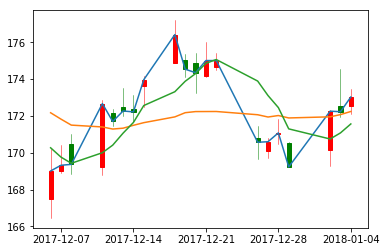

In [95]:
ax = plt.gca()

ax.xaxis_date()
candlestick_ohlc(ax,df_ohlcm.values,width=0.4, colorup='r', colordown='g');
plt.plot(dates, close)
plt.plot(dates, ma20)
plt.plot(dates, ma5)


In [ ]:
ax = plt.gca()

ax.xaxis_date()
candlestick_ohlc(ax,df_ohlcm.values,width=0.4, colorup='r', colordown='g');
plt.plot(dates, close)
plt.plot(dates, ma20)
plt.plot(dates, ma5)

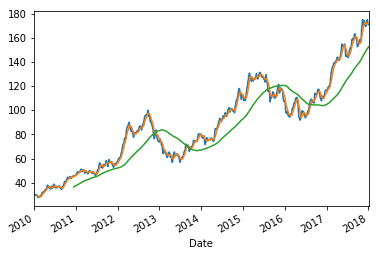

In [107]:
df=df.reset_index()

In [108]:
def stock(n=0):
    if n<0:
        n=0
    if n>220:
        n=220
    dfm = df[["Date", "Open", "High", "Low", "Close"]][n:n+20]
    ma240 = df.MA240[n:n+20]
    ma20 = df.MA20[n:n+20]
    ma5 = df.MA5[n:n+20]
    
    dates = dfm["Date"].values
    close = dfm["Close"].values
    
    ax = plt.gca()

    ax.xaxis_date()
    candlestick_ohlc(ax,dfm.values, width=0.4, colorup='r', colordown='g');
    plt.plot(dates, close)
    plt.plot(dates, ma240)
    plt.plot(dates, ma20)
    plt.plot(dates, ma5)

In [111]:
n=3
dfm = df[["Date", "Open", "High", "Low", "Close"]][n:n+20]

3    2010-01-06
4    2010-01-07
5    2010-01-08
6    2010-01-11
7    2010-01-12
8    2010-01-13
9    2010-01-14
10   2010-01-15
11   2010-01-19
12   2010-01-20
13   2010-01-21
14   2010-01-22
15   2010-01-25
16   2010-01-26
17   2010-01-27
18   2010-01-28
19   2010-01-29
20   2010-02-01
21   2010-02-02
22   2010-02-03
Name: Date, dtype: datetime64[ns]